In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import airy
from scipy.optimize import brentq
from scipy.linalg import *

In [3]:
#konstante

AA=8.6375   #m/hbar
BB=13.12     #m/hbar**2
hbar=AA/BB
m=AA*hbar

a = 1.3
V0 = 0.7

In [4]:
#potencijal
def V(x):
    k = np.floor(x/(2*a))
    return V0/a*(np.abs(x-(2*k+1)*a)-a)

N = 10
xmesh = np.arange(-N/2*a, N/2*a, 0.1)
pot = [V(x) for x in xmesh]

Text(0.5, 1.0, 'potencijal')

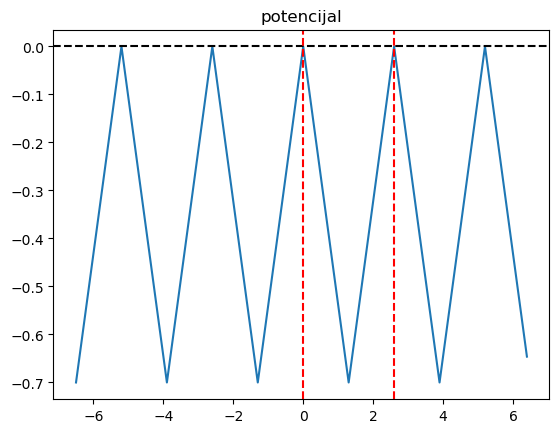

In [5]:
plt.plot(xmesh, pot)
plt.axhline(y=0, ls='--', color='black')
plt.axvline(x=0, ls='--', color='red')
plt.axvline(x=2*a, ls='--',color='red')
plt.title('potencijal')

# Analitički

In [6]:
#uvjet energije - dobiven analitički
def fja(E):
    gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
    lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
    p = airy(gamma)
    q = airy(lam)
    Aiy = p[0]
    dAiy = p[1]
    Biy = p[2]
    dBiy = p[3]
    Ail = q[0]
    dAil = q[1]
    Bil = q[2]
    dBil = q[3]
    f1 = Biy*dBiy*Ail*dAil + Aiy*dAiy*Bil*dBil
    f2 = Ail*dBil + Bil*dAil
    f3 = Aiy*dBiy + Biy*dAiy
    f4 = Ail*dBil - Bil*dAil
    f5 = Aiy*dBiy - Biy*dAiy
    return np.abs(2*f1-f2*f3)/np.abs(f4*f5)

In [7]:
energija = np.arange(-0.5, -0.4, 0.0001)
uvjet = [fja(e) for e in energija]

Text(0.5, 1.0, 'uvjeti energije - najniža vrpca')

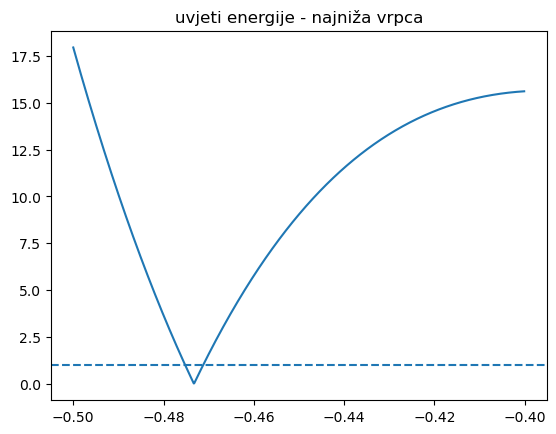

In [9]:
plt.plot(energija, uvjet)
plt.axhline(y=1, ls='--')
#plt.axvline(x=-0.150837)
plt.title('uvjeti energije - najniža vrpca')

#print('razlog zašto je najniža tako zumirana je jer je jako malo područje pa se ne vidi kad se crta funkcija na većem intervalu')

Text(0.5, 1.0, 'energije - ostala područja')

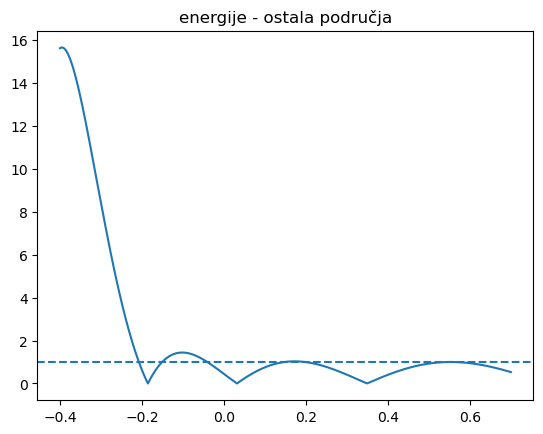

In [10]:
energija = np.arange(-0.4, V0, 0.0001)
uvjet = [fja(e) for e in energija]
plt.plot(energija, uvjet)
plt.axhline(y=1, ls='--')
plt.title('energije - ostala područja')

In [11]:
def fja2(E):
    return fja(E) - 1

E0min = brentq(fja2, -0.5, -0.475)
E0max = brentq(fja2, -0.475, -0.46)

print('Raspon prve vrpce:')
print(E0min)
print(E0max)


E1min = brentq(fja2, -0.3, -0.2)
E1max = brentq(fja2, -0.2, -0.1)

print('\nRaspon druge vrpce:')
print(E1min)
print(E1max)


E2min = brentq(fja2, -0.1, 0)
E2max = brentq(fja2, 0, 0.15)

print('\nRaspon treće vrpce')
print(E2min)
print(E2max)

Raspon prve vrpce:
-0.4752029204493031
-0.4712317216920364

Raspon druge vrpce:
-0.2076246132936505
-0.1508374288588314

Raspon treće vrpce
-0.04067995900581192
0.1476794546410979


# Numerika

In [12]:
N=20

L = N*2*a
Nsub = 500
dx   =  L/Nsub
Xmin = -L/2
Xmax =  L/2

u=1.0/dx**2/BB/2
d=1.0/dx**2/BB

x=np.arange(Xmin,Xmax+dx/2,dx)
Npts=len(x)
V_x=np.zeros([Npts],float)

In [13]:
for i in range(0,Npts,1):
    xval=x[i]
    k=np.floor((xval)/2/a)
    if k>N/2-1:
        k=N/2-1
    fac=2*k+1
    #val=V0*(xval-fac*np.sign(xval)*a/2)**2
    val=V0/a*(np.abs(xval-fac*a)-a)
    if abs(xval) < 1.e-5:
        #val=V0*a**2/4
        val = 0
    V_x[i]=val  

In [15]:
ham=np.zeros([2,Npts-2],float)

for i in range(1,Npts-2,1):
    ham[0,i]=-u
for i in range(0,Npts-2,1):
    ham[1,i]=V_x[i+1]+d
#ham[0,0]=-99.0
ham[0,0] = 0
#print(ham)
eigen,v=eig_banded(ham)

print('Najnize stanje u prvoj vrpci: ',eigen[0])
print('Najviše stanje u prvoj vrpci: ',eigen[N-1])

print('Najnize stanje u drugoj vrpci: ',eigen[N])
print('Najviše stanje u drugoj vrpci: ',eigen[2*N-1])

print('Najnize stanje u 3. vrpci: ',eigen[2*N])
print('Najviše stanje u 3. vrpci: ',eigen[3*N-1])


print('analitički:\n')
print('prva vrpca')
print(E0min)
print(E0max)

print('\ndruga vrpca')
print(E1min)
print(E1max)

print('\ntreća vrpca')
print(E2min)
print(E2max)

Najnize stanje u prvoj vrpci:  -0.47507799818211616
Najviše stanje u prvoj vrpci:  -0.47110260620254485
Najnize stanje u drugoj vrpci:  -0.20805511265404147
Najviše stanje u drugoj vrpci:  -0.1526337928074027
Najnize stanje u 3. vrpci:  -0.040612448723865
Najviše stanje u 3. vrpci:  0.1414496268983163
analitički:

prva vrpca
-0.4752029204493031
-0.4712317216920364

druga vrpca
-0.2076246132936505
-0.1508374288588314

treća vrpca
-0.04067995900581192
0.1476794546410979


Text(0.5, 1.0, 'prve tri vrpce')

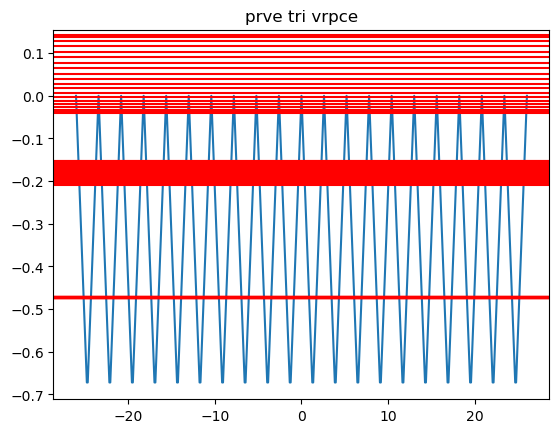

In [16]:
#plot vrpci

plt.plot(x, V_x)
#plt.axvline(x=2*a)
for i in range(0*N, 1*N):
    plt.axhline(eigen[i], color = 'red')
    plt.axhline(eigen[i+N], color='red')
    plt.axhline(eigen[i+2*N], color='red')
plt.title('prve tri vrpce')

In [17]:
nmax=N*5
wave=np.zeros([Npts,nmax],float)
for j in range(0,nmax,1):
    for i in range(1,Npts-2,1):
        wave[i,j]=v[i-1,j]
    wave[0,j]      = 0.0
    wave[Npts-1,j] = 0.0

In [18]:
#analitika - valne fje:
k = 0
E = E0min
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr

In [19]:
A=1
alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
C=alfa+beta*D
B=(-a11-a13*C-a14*D)/a12
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))


1 (0.008714900000777787+0j) (1+0j) (0.008714900000777787-0j)
provjera:

 (-3.7513395167998453e-17+0j)
(1.8214596497756474e-16+0j)
(6.938893903907228e-18+0j)
(3.191891195797325e-16+0j)
(-3.049637168141822e-15+0j)


In [20]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

In [21]:
for i in range(0, len(x)):
    if np.abs(x[i]) < 10**(-8):
        print(i)
        
fac = wf_1[0]/wave[250, 0]


250


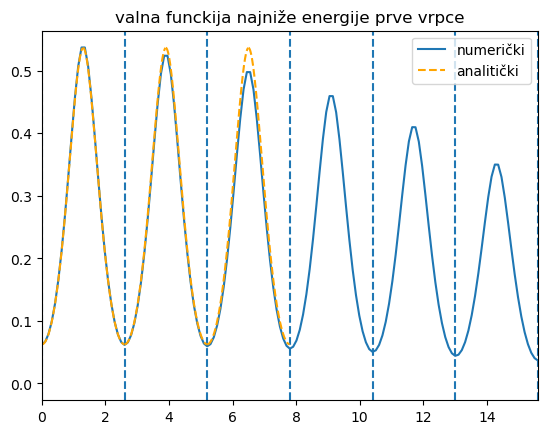

In [22]:
plt.plot(x, np.real(fac*wave[:, 0]), label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funckija najniže energije prve vrpce')
plt.legend()

In [23]:
#analitika - valne fje:
k = np.pi/2/a
E = E0max
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr
A=1
#alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
#beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

#D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
#C=alfa+beta*D
#B=(-a11-a13*C-a14*D)/a12
#print(A,B,C,D)

matrica = np.array([[a12, a13, a14],[a22, a23, a24],[a42,a43,a44]])
b=np.array([-a11, -a21, -a41])
rj = solve(matrica,b)

B= rj[0]
C=rj[1]
D=rj[2]
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))
#?????

1 (-0.007652573279552809-4.758949353662773e-18j) (1-1.5639862177776494e-18j) (-0.007652573279552809+4.7709178728025256e-18j)
provjera:

 (-2.656295322589486e-17-9.62964972193618e-35j)
-7.703719777548943e-34j
(-1.727090692682509e-14+4.911891730165206e-30j)
-3.0814879110195774e-33j
(-5.4515074180237003e-14+3.0870345892594126e-29j)


In [24]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

fac = wf_1[0]/wave[250, N-1]#ne funckcionira u ovom slučaju jer počinje s nulom,"napipat" ćemo odgovarajući fatkor

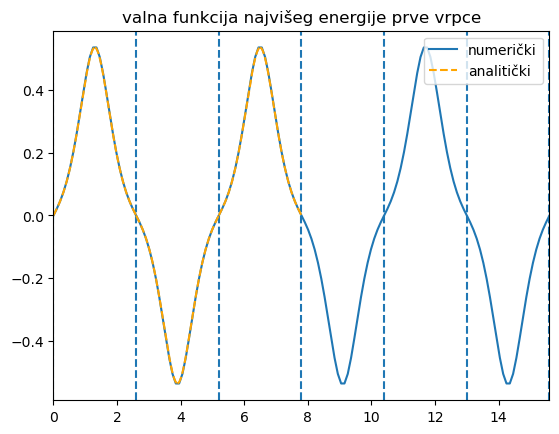

In [25]:
plt.plot(x, 6.8*wave[:, N-1], label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funkcija najvišeg energije prve vrpce')
plt.legend()

In [26]:
#analitika - valne fje:
k = np.pi/2/a
E = E1min
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr
A=1
alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
C=alfa+beta*D
B=(-a11-a13*C-a14*D)/a12
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))
#?????

1 (0.1968515500191374+9.569679795995011e-17j) (-0.9999999999999999-2.324809920698177e-17j) (-0.19685155001913737+9.112037359605706e-17j)
provjera:

 (-2.7755575615628914e-17-6.162975822039155e-33j)
(8.326672684688674e-17+1.5407439555097887e-33j)
(-2.7755575615628914e-17-6.162975822039155e-32j)
(1.6653345369377348e-16-6.162975822039155e-32j)
(-1.1679460722141129e-16+7.495028056774672e-32j)


In [27]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

fac = wf_1[0]/wave[250, N]

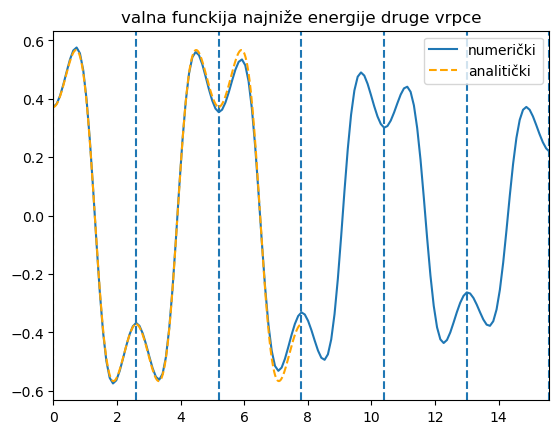

In [28]:
plt.plot(x, np.real(fac*wave[:, N]), label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funckija najniže energije druge vrpce')
plt.legend()

In [29]:
#analitika - valne fje:
k = 0
E = E1max
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr
A=1
#alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
#beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

#D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
#C=alfa+beta*D
#B=(-a11-a13*C-a14*D)/a12
#print(A,B,C,D)

matrica = np.array([[a12, a13, a14],[a22, a23, a24],[a42,a43,a44]])
b=np.array([-a11, -a21, -a41])
rj = solve(matrica,b)

B= rj[0]
C=rj[1]
D=rj[2]
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))
#?????

1 (-0.2021192558567319+0j) (-1+0j) (0.2021192558567319+0j)
provjera:

 (-2.7755575615628914e-17+0j)
(-2.7755575615628914e-17+0j)
(-5.491163079796024e-13+0j)
0j
(1.9414019450273275e-13+0j)


In [30]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

fac = wf_1[0]/wave[250, 2*N-1]#ne funckcionira u ovom slučaju jer počinje s nulom,"napipat" ćemo odgovarajući fatkor

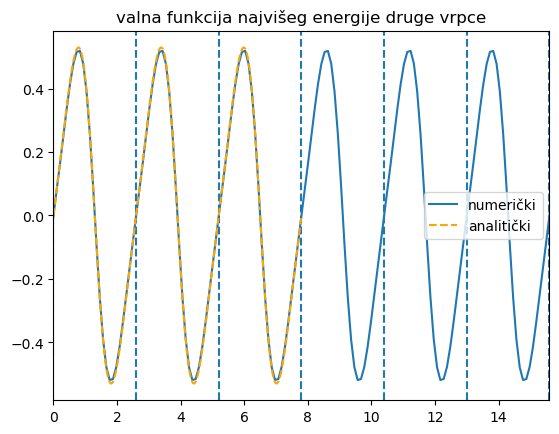

In [31]:
plt.plot(x, 8*wave[:, 2*N-1], label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funkcija najvišeg energije druge vrpce')
plt.legend()

In [32]:
#analitika - valne fje:
k = 0
E = E2min
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr
A=1
alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
C=alfa+beta*D
B=(-a11-a13*C-a14*D)/a12
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))
#?????

1 (0.5515639603055383-0j) (1.0000000000000007+0j) (0.5515639603055372+0j)
provjera:

 (-1.3877787807814457e-17+0j)
(-1.6653345369377348e-16+0j)
(5.551115123125783e-16+0j)
(1.2879697308676441e-12+0j)
(3.1095284372556316e-13+0j)


In [33]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

fac = wf_1[0]/wave[250, 2*N]

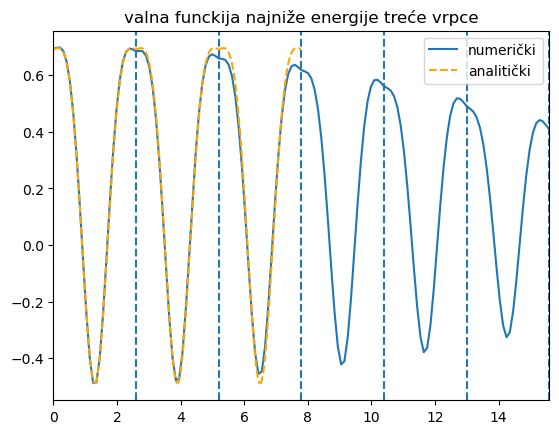

In [34]:
plt.plot(x, np.real(fac*wave[:, 2*N]), label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funckija najniže energije treće vrpce')
plt.legend()

In [35]:
#analitika - valne fje:
k = np.pi/2/a
E = E2max
gamma = -(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0+E)
lam = -E*(2*m*a**2/hbar**2/V0**2)**(1/3)
p = airy(gamma)
q = airy(lam)
Aiy = p[0]
dAiy = p[1]
Biy = p[2]
dBiy = p[3]
Ail = q[0]
dAil = q[1]
Bil = q[2]
dBil = q[3]

b = np.array([0,0,0,0])

a11=Aiy; a12=Biy; a13=-Aiy; a14=-Biy
a21 = dAiy; a22 = dBiy; a23 = dAiy; a24=dBiy
a31=np.exp(1j*2*k*a)*Ail; a32=np.exp(1j*2*k*a)*Bil; a33=-Ail; a34=-Bil
a41=np.exp(1j*2*k*a)*dAil; a42 = np.exp(1j*2*k*a)*dBil; a43 = dAil; a44=dBil
#a31=0
arr = np.array([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
#arr
A=1
#alfa=(-a21+a11*a22/a12)/(a23-a22*a13/a12)
#beta=(-a24+a22/a12*a14)/(a23-a22*a13/a12)

#D=(-a31+a32*a11/a12+alfa*a13*a32/a12-a33*alfa)/(a34+a33*beta-a14*a32/a12-a13*a32/a12*beta)
#C=alfa+beta*D
#B=(-a11-a13*C-a14*D)/a12
#print(A,B,C,D)

matrica = np.array([[a12, a13, a14],[a22, a23, a24],[a42,a43,a44]])
b=np.array([-a11, -a21, -a41])
rj = solve(matrica,b)

B= rj[0]
C=rj[1]
D=rj[2]
print(A,B,C,D)

print('provjera:\n\n', a11+a12*B+a13*C+a14*D)
print(a21+a22*B+a23*C+a24*D)
print(a31+a32*B+a33*C+a34*D)
print(a41+a42*B+a43*C+a44*D)
print(det(arr))
#?????

1 (-1.7116463219874398-3.947817374961352e-15j) (1.000000000000001+3.3726057509054172e-15j) (-1.7116463219874396-1.8248908540895912e-15j)
provjera:

 (2.220446049250313e-16-9.860761315262648e-32j)
(-1.1102230246251565e-16+6.902532920683853e-31j)
(-3.1086244689504383e-15-4.0429121392576855e-30j)
0j
(-1.4393960251776182e-16+8.011868568650901e-32j)


In [36]:
x_1 = np.arange(0, a, 0.01)
x_2 = np.arange(a, 2*a, 0.01)
x_3 = x_1 + 2*a
x_4 = x_2 + 2*a
x_5 = x_1 + 4*a
x_6 = x_2 + 4*a
wf_1 = [A*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[0] + B*airy(-(2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a+E))[2] for x in x_1]
wf_2 = [C*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[0] + D*airy((2*m*a**2/hbar**2/V0**2)**(1/3)*(V0*x/a-V0*2-E))[2] for x in x_2]
wf_1 = np.array(wf_1)
wf_2 = np.array(wf_2)
wf_3 = np.exp(1j*k*2*a)*wf_1
wf_4 = np.exp(1j*k*2*a)*wf_2
wf_5 = np.exp(1j*k*2*a)*wf_3
wf_6 = np.exp(1j*k*2*a)*wf_4

fac = wf_1[0]/wave[250, 3*N-1]#ne funckcionira u ovom slučaju jer počinje s nulom,"napipat" ćemo odgovarajući fatkor

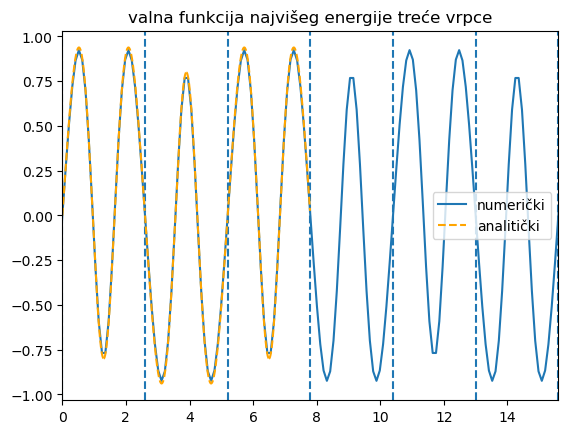

In [37]:
plt.plot(x, 14*wave[:, 3*N-1], label='numerički')
for i in range(0, 7):
    plt.axvline(x=i*a*2, ls='--')
    
plt.xlim(0, 2*a*6)
#plt.title('Najniže stanje u drugoj vrpci')
plt.plot(x_1, np.real(wf_1), ls='--', color = 'orange')
plt.plot(x_2, np.real(wf_2), ls='--', color = 'orange')
plt.plot(x_3, np.real(wf_3), ls='--', color = 'orange')
plt.plot(x_4, np.real(wf_4), ls='--', color = 'orange')
plt.plot(x_5, np.real(wf_5), ls='--', color = 'orange')
plt.plot(x_6, np.real(wf_6), ls='--', color = 'orange', label = 'analitički')
plt.title('valna funkcija najvišeg energije treće vrpce')
plt.legend()

Numerika i analitika se dosta dobro poklapaju.

Numeričke energije se malo razlikuju od analitičkih, to je stvar ove numeričke metode i činjenice da ona ima konačnu preciznost.

Isto tako ni same funkcije se ne poklapaju skroz, razlog je da numerika nije točno pogodila rubno stanje, pa ni valna funkcija nije za istu energiju.

Preciznost numerike se uvijek može povećati, kao trade-off račun dulje traje.